# Homework 3 

You will have 2 datasets to work on.

### 1. Wikipedia Web Traffic Time Series

Data from [Kaggle competition](https://www.kaggle.com/c/web-traffic-time-series-forecasting)* )

*wikipedia_train3* - train data *wikipedia_test3* - test data created by us from original train data . For more information about dataset, please visit Homework1 assignment


### 2. French dataset

Lanfrain Lanfra


You have to answer questions in this [form]() and provide your code



In [89]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, RobustScaler, StandardScaler, PolynomialFeatures
import math
from dateutil.relativedelta import relativedelta
from sklearn.pipeline import make_pipeline

In [90]:
### This is data from wikipedia3 archive in data folder
train = pd.read_csv("E:\\PycharmProjects\\Machine_L\\Data_Science_Club\\udscourse-master\\udscourse-master\\data\\wikipedia_train3.csv")
test = pd.read_csv("E:\\PycharmProjects\\Machine_L\\Data_Science_Club\\udscourse-master\\udscourse-master\\data\\wikipedia_test3.csv")
train.head()

Page        date  Visits
0  Special:Search_zh.wikipedia.org_all-access_spider  2016-01-01  2660.0
1    Wikipedia:首页_zh.wikipedia.org_all-access_spider  2016-01-01  9936.0
2      Project:上传_zh.wikipedia.org_all-access_spider  2016-01-01  1712.0
3    Special:用户登录_zh.wikipedia.org_all-access_spider  2016-01-01  3175.0
4  Championnat_d'Europe_de_football_2016_fr.wikip...  2016-01-01  1682.0

**1.** Take a look carefuly at train and test dataset. Note for you what is the difference in them and how they are dependent. **For _only_ train** create a holdout validation using any type of split you think is useful here. What is the split type you are using? Answer in google forms

**2.** Write a code to compare the score of your validation and test set. For scoring, use metric SMAPE (code is in lecture). For prediction use 15 previous days median. In the google form write your validation score.

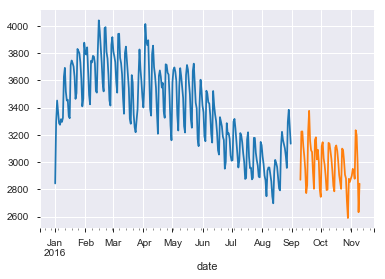

In [91]:
%matplotlib inline
train.index = pd.to_datetime(train.date)
test.index = pd.to_datetime(test.date)
train.date = pd.to_datetime(train.date)
test.date = pd.to_datetime(test.date)
train.Visits.resample('D').median().plot()
test.Visits.resample('D').median().plot()

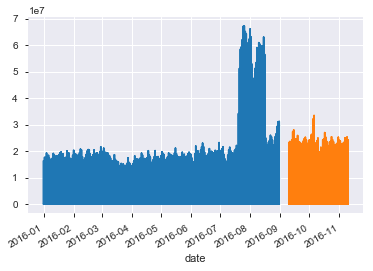

In [92]:
train.Visits.plot()
test.Visits.plot()

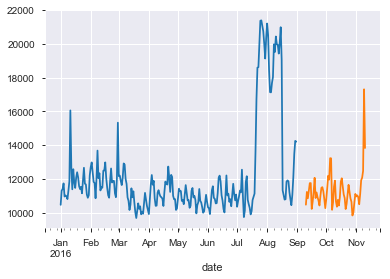

In [93]:
train.Visits.resample('D').mean().plot()
test.Visits.resample('D').mean().plot()

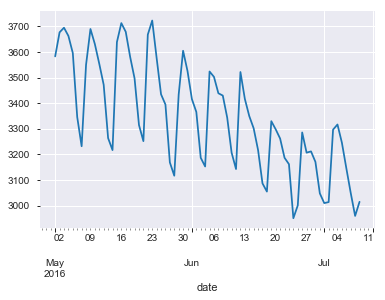

In [94]:
#tr = train[train.date > '2016-05-10'] # smape gives 68.08 on validation (date < 2016-05-10) and 68.51 on test
#tr = train[(train.date > '2016-06-10')] # smape gives 67.48 on validation (date < 2016-06-10) and 68.47 on test
#tr = train[train.date > '2016-04-20'] # smape gives 68.60 on validation (date < 2016-04-20) and 68.56 on test
tr = train[(train.date > '2016-04-30') & (train.date < '2016-07-10')] # smape gives 68.4914 on validation (date <= 2016-04-30) and 68.4907 on test
X_tr, y_tr = tr.date, tr.Visits
tr.Visits.resample('D').median().plot()

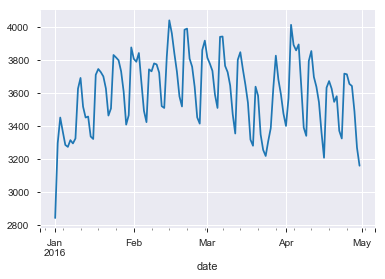

In [95]:
valid = train[(train.date <= '2016-04-30')]
X_val, y_val = valid.date, valid.Visits
valid.Visits.resample('D').median().plot()

In [96]:
def smape_fast(y_true, y_pred):
    out = 0
    for i in range(y_true.shape[0]):
        a = y_true.iloc[i]
        b = y_pred[i]
        if b < 1:
            b = 0
        c = a+b
        if c == 0:
            continue
        out += math.fabs(a - b) / c
    out *= (200.0 / y_true.shape[0])
    return out

In [97]:
valid['pred_visits'] = np.median(tr[tr.date >= '2016-06-25'].Visits).astype('int32')
valid.head()

c:\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Page       date  \
date                                                                       
2016-01-01  Special:Search_zh.wikipedia.org_all-access_spider 2016-01-01   
2016-01-01    Wikipedia:首页_zh.wikipedia.org_all-access_spider 2016-01-01   
2016-01-01      Project:上传_zh.wikipedia.org_all-access_spider 2016-01-01   
2016-01-01    Special:用户登录_zh.wikipedia.org_all-access_spider 2016-01-01   
2016-01-01  Championnat_d'Europe_de_football_2016_fr.wikip... 2016-01-01   

            Visits  pred_visits  
date                             
2016-01-01  2660.0         3130  
2016-01-01  9936.0         3130  
2016-01-01  1712.0         3130  
2016-01-01  3175.0         3130  
2016-01-01  1682.0         3130

In [98]:
smape_fast(valid['Visits'], valid['pred_visits'])

68.49141957473499

In [99]:
test['pred_visits'] = np.median(tr[tr.date >= '2016-06-25'].Visits).astype('int32')
smape_fast(test['Visits'], test['pred_visits'])

68.49079831841144

**3.** Perform K-fold validation using your type of split. Run GridSearch with any classificator you like and set of parameters to optimize, providing it with your custom validation.  Compare the score of your validation and test set. For scoring, again, use metrics SMAPE. In the google form write your score

In [101]:
### Your code here
def create_validation_(df, start_date):
    return df.loc[(df.date >= start_date) & \
                  (df.date <  '2016-03-01')].index, \
           df.loc[(df.date >= '2016-03-01') & \
                  (df.date < '2016-04-01') ].index
def create_validation(df, start_date):
    return df.loc[(df.date >= start_date) & \
                  (df.date <  '2016-06-01')].index, \
           df.loc[(df.date >= '2016-06-01') & \
                  (df.date < '2016-07-01') ].index


In [102]:
train_dates = ['2016-01-01']
tr_ = ['2016-04-01']

In [103]:
myCViterator = []
for i, j in zip(train_dates, tr_):
    trainIndices, valIndices = create_validation_(train[train.date < '2016-07-01'], i)
    train_in, val_in = create_validation(train[train.date < '2016-07-01'], j)
    myCViterator.append((trainIndices, valIndices))
    myCViterator.append((train_in, val_in))

In [104]:
for x,y in myCViterator:
    print (min(x), min(y))
    print(max(x), max(y))

2016-01-01 00:00:00 2016-03-01 00:00:00
2016-02-29 00:00:00 2016-03-31 00:00:00
2016-04-01 00:00:00 2016-06-01 00:00:00
2016-05-31 00:00:00 2016-06-30 00:00:00


In [105]:
def create_validation1(df, start_date):
    return df.loc[(df['date'] >= pd.to_datetime(start_date) - relativedelta(days=0)) & \
                  (df['date'] <  pd.to_datetime(start_date) + relativedelta(months=2))].index, \
           df.loc[(df['date'] >= pd.to_datetime(start_date) + relativedelta(months=2)) & \
                  (df['date'] <  pd.to_datetime(start_date) + relativedelta(months=3))].index

In [106]:
train_dates = ['2016-01-01', '2016-04-01']

In [107]:
myCViterator1 = []
for i in train_dates:
    trainIndices, valIndices = create_validation1(train, i)
    myCViterator.append( (trainIndices, valIndices) )

In [108]:
for x,y in myCViterator1:
    print (min(x), min(y))

In [52]:
regressor = RandomForestRegressor(random_state = 42)
#pipe = make_pipeline([('regressor', regressor)])
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
             'n_estimators': [10, 30, 50, 70, 100]}

kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
grid_search2 = GridSearchCV(regressor, param_grid=param_grid, cv = 3, n_jobs = -1, verbose = 2)
x = pd.DataFrame(X_tr)
y = pd.DataFrame(y_tr)

%time grid_search2.fit(x,y)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.2min finished
c:\python36\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Wall time: 1min 58s


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [10, 30, 50, 70, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [53]:
smape_fast(test.Visits, grid_search2.best_estimator_.predict(pd.DataFrame(test.date)))# тест

106.35085345489564

In [55]:
smape_fast(valid.Visits, grid_search2.best_estimator_.predict(pd.DataFrame(valid.date)))# валидация

100.87410511144363

In [112]:
regressor = RandomForestRegressor(random_state = 42)
#pipe = make_pipeline([('regressor', regressor)])
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
             'n_estimators': [10, 30, 50, 70, 100]}

kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
grid_search1 = GridSearchCV(regressor, param_grid=param_grid, cv = myCViterator, n_jobs = -1, verbose = 2)
x = pd.DataFrame(train[train.date < '2016-07-01'].date)
y = pd.DataFrame(train[train.date < '2016-07-01'].Visits)

%time grid_search1.fit(x,y)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


JoblibIndexError: JoblibIndexError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
c:\python36\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...on36\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
c:\python36\lib\runpy.py in _run_code(code=<code object <module> at 0x04D32BD0, file "c:\py...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'c:\python36\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'c:\python36\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...on36\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'c:\\python36\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...on36\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x04D32BD0, file "c:\py...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'c:\python36\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'c:\python36\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...on36\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'c:\\python36\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
c:\python36\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
c:\python36\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
c:\python36\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         self.io_loop = ioloop.IOLoop.current()
    477         try:
--> 478             self.io_loop.start()
        self.io_loop.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    479         except KeyboardInterrupt:
    480             pass
    481 
    482 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
c:\python36\lib\site-packages\zmq\eventloop\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
c:\python36\lib\site-packages\tornado\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
c:\python36\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
c:\python36\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
c:\python36\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
c:\python36\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
c:\python36\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
c:\python36\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    276         if self.control_stream:
    277             self.control_stream.on_recv(self.dispatch_control, copy=False)
    278 
    279         def make_dispatcher(stream):
    280             def dispatcher(msg):
--> 281                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    282             return dispatcher
    283 
    284         for s in self.shell_streams:
    285             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
c:\python36\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': "regressor = RandomForestRegressor(random_state =...2016-07-01'].Visits)\n\n%time grid_search1.fit(x,y)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 3, 20, 21, 44, 47, 794931, tzinfo=tzutc()), 'msg_id': 'C70962C0F50C41D6856C493BBBF73E43', 'msg_type': 'execute_request', 'session': '77F88D36EA0F46389C1EC8B8F6138F03', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'C70962C0F50C41D6856C493BBBF73E43', 'msg_type': 'execute_request', 'parent_header': {}})
    227             self.log.warn("Unknown message type: %r", msg_type)
    228         else:
    229             self.log.debug("%s: %s", msg_type, msg)
    230             self.pre_handler_hook()
    231             try:
--> 232                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'77F88D36EA0F46389C1EC8B8F6138F03']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': "regressor = RandomForestRegressor(random_state =...2016-07-01'].Visits)\n\n%time grid_search1.fit(x,y)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 3, 20, 21, 44, 47, 794931, tzinfo=tzutc()), 'msg_id': 'C70962C0F50C41D6856C493BBBF73E43', 'msg_type': 'execute_request', 'session': '77F88D36EA0F46389C1EC8B8F6138F03', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'C70962C0F50C41D6856C493BBBF73E43', 'msg_type': 'execute_request', 'parent_header': {}}
    233             except Exception:
    234                 self.log.error("Exception in message handler:", exc_info=True)
    235             finally:
    236                 self.post_handler_hook()

...........................................................................
c:\python36\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'77F88D36EA0F46389C1EC8B8F6138F03'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': "regressor = RandomForestRegressor(random_state =...2016-07-01'].Visits)\n\n%time grid_search1.fit(x,y)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 3, 20, 21, 44, 47, 794931, tzinfo=tzutc()), 'msg_id': 'C70962C0F50C41D6856C493BBBF73E43', 'msg_type': 'execute_request', 'session': '77F88D36EA0F46389C1EC8B8F6138F03', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'C70962C0F50C41D6856C493BBBF73E43', 'msg_type': 'execute_request', 'parent_header': {}})
    392         if not silent:
    393             self.execution_count += 1
    394             self._publish_execute_input(code, parent, self.execution_count)
    395 
    396         reply_content = self.do_execute(code, silent, store_history,
--> 397                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    398 
    399         # Flush output before sending the reply.
    400         sys.stdout.flush()
    401         sys.stderr.flush()

...........................................................................
c:\python36\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code="regressor = RandomForestRegressor(random_state =...2016-07-01'].Visits)\n\n%time grid_search1.fit(x,y)", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = "regressor = RandomForestRegressor(random_state =...2016-07-01'].Visits)\n\n%time grid_search1.fit(x,y)"
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
c:\python36\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=("regressor = RandomForestRegressor(random_state =...2016-07-01'].Visits)\n\n%time grid_search1.fit(x,y)",), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ("regressor = RandomForestRegressor(random_state =...2016-07-01'].Visits)\n\n%time grid_search1.fit(x,y)",)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
c:\python36\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="regressor = RandomForestRegressor(random_state =...2016-07-01'].Visits)\n\n%time grid_search1.fit(x,y)", store_history=True, silent=False, shell_futures=True)
   2723                 self.displayhook.exec_result = result
   2724 
   2725                 # Execute the user code
   2726                 interactivity = "none" if silent else self.ast_node_interactivity
   2727                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2728                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2729                 
   2730                 self.last_execution_succeeded = not has_raised
   2731                 self.last_execution_result = result
   2732 

...........................................................................
c:\python36\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>], cell_name='<ipython-input-112-13708ba4e533>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 164b50f0, execution_c..._before_exec=None error_in_exec=None result=None>)
   2851                     return True
   2852 
   2853             for i, node in enumerate(to_run_interactive):
   2854                 mod = ast.Interactive([node])
   2855                 code = compiler(mod, cell_name, "single")
-> 2856                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x13D287B0, file "<ipython-input-112-13708ba4e533>", line 11>
        result = <ExecutionResult object at 164b50f0, execution_c..._before_exec=None error_in_exec=None result=None>
   2857                     return True
   2858 
   2859             # Flush softspace
   2860             if softspace(sys.stdout, 0):

...........................................................................
c:\python36\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x13D287B0, file "<ipython-input-112-13708ba4e533>", line 11>, result=<ExecutionResult object at 164b50f0, execution_c..._before_exec=None error_in_exec=None result=None>)
   2905         outflag = True  # happens in more places, so it's easier as default
   2906         try:
   2907             try:
   2908                 self.hooks.pre_run_code_hook()
   2909                 #rprint('Running code', repr(code_obj)) # dbg
-> 2910                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x13D287B0, file "<ipython-input-112-13708ba4e533>", line 11>
        self.user_global_ns = {'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', r"train_fr = pd.read_csv('E:\\PycharmProjects\\Mac...aster\\udscourse-master\\data\\train_french.csv')", 'import pandas as pd\nimport numpy as np\nimport pa...edelta\nfrom sklearn.pipeline import make_pipeline', r"train_fr = pd.read_csv('E:\\PycharmProjects\\Mac...aster\\udscourse-master\\data\\train_french.csv')", 'pp.ProfileReport(train_fr)', "target = train_fr.prime_tot_ttc\nfeatures = train_fr.loc[:, 'code_postal':'var11']", "pd.get_dummies((train_fr['profession'][0].split(';')))", "np.unique(train_fr.profession.str.split(';'))", "features = features[['code_postal'] + ['nb_piece...'var7'] + ['var9'] + ['veranda']]\nfeatures.head()", 'features = pd.get_dummies(features)', 'features.head()', 'scaler_rob = RobustScaler()\nscaled_features = pd...:"var10"].columns.tolist()\nscaled_features.head()', "features.loc[:, 'code_postal'] = scaled_features.loc[:, 'code_postal']\nfeatures.head()", "#features.loc[:, 'code_postal'] = scaled_feature...= scaled_features.loc[:, 'var10']\nfeatures.head()", 'model_ridge_sc = Ridge(random_state = 42)\nmodel_ridge_sc.fit(features, target)#with scaled features', 'def MAPE(y, y_predict):\n    return (np.mean(np.abs((y - y_predict) / y))) * 100', "test_target = test_fr.prime_tot_ttc\ntest_feature...']]\ntest_features = pd.get_dummies(test_features)", 'test_scaled_features = pd.DataFrame(scaler_rob.f...= test_features.loc[:, :"var10"].columns.tolist()', "test_features.loc[:, 'code_postal'] = test_scale...led_features.loc[:, 'var10']\ntest_features.head()", 'MAPE(test_target, model_ridge_sc.predict(test_scaledfeatures))', ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'Lasso': <class 'sklearn.linear_model.coordinate_descent.Lasso'>, 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'MAPE': <function MAPE>, 'MinMaxScaler': <class 'sklearn.preprocessing.data.MinMaxScaler'>, 'OneHotEncoder': <class 'sklearn.preprocessing.data.OneHotEncoder'>, 'Out': {4: <pandas_profiling.ProfileReport object>, 6:     employe  agent
0         0      1
1         1      0, 7: array([list(["absence d'information"]), list(['a...liberale']), list(['technicien'])], dtype=object), 8:    code_postal  nb_pieces  biens_nomades  domain...   0     0   NON     NON  

[5 rows x 28 columns], 10:    code_postal  nb_pieces  biens_nomades  domain...          1            0  

[5 rows x 60 columns], 11:    code_postal  nb_pieces  biens_nomades  domain....192308   0.0   0.15  
4  0.000000   0.0  -0.60  , 12:    code_postal  nb_pieces  biens_nomades  domain...          1            0  

[5 rows x 60 columns], 13:    code_postal  nb_pieces  biens_nomades  domain...          1            0  

[5 rows x 60 columns], 14: Ridge(alpha=1.0, copy_X=True, fit_intercept=True...False, random_state=42, solver='auto', tol=0.001), 18:    code_postal  nb_pieces  biens_nomades  domain...          1            0  

[5 rows x 60 columns], ...}, 'PolynomialFeatures': <class 'sklearn.preprocessing.data.PolynomialFeatures'>, ...}
        self.user_ns = {'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', r"train_fr = pd.read_csv('E:\\PycharmProjects\\Mac...aster\\udscourse-master\\data\\train_french.csv')", 'import pandas as pd\nimport numpy as np\nimport pa...edelta\nfrom sklearn.pipeline import make_pipeline', r"train_fr = pd.read_csv('E:\\PycharmProjects\\Mac...aster\\udscourse-master\\data\\train_french.csv')", 'pp.ProfileReport(train_fr)', "target = train_fr.prime_tot_ttc\nfeatures = train_fr.loc[:, 'code_postal':'var11']", "pd.get_dummies((train_fr['profession'][0].split(';')))", "np.unique(train_fr.profession.str.split(';'))", "features = features[['code_postal'] + ['nb_piece...'var7'] + ['var9'] + ['veranda']]\nfeatures.head()", 'features = pd.get_dummies(features)', 'features.head()', 'scaler_rob = RobustScaler()\nscaled_features = pd...:"var10"].columns.tolist()\nscaled_features.head()', "features.loc[:, 'code_postal'] = scaled_features.loc[:, 'code_postal']\nfeatures.head()", "#features.loc[:, 'code_postal'] = scaled_feature...= scaled_features.loc[:, 'var10']\nfeatures.head()", 'model_ridge_sc = Ridge(random_state = 42)\nmodel_ridge_sc.fit(features, target)#with scaled features', 'def MAPE(y, y_predict):\n    return (np.mean(np.abs((y - y_predict) / y))) * 100', "test_target = test_fr.prime_tot_ttc\ntest_feature...']]\ntest_features = pd.get_dummies(test_features)", 'test_scaled_features = pd.DataFrame(scaler_rob.f...= test_features.loc[:, :"var10"].columns.tolist()', "test_features.loc[:, 'code_postal'] = test_scale...led_features.loc[:, 'var10']\ntest_features.head()", 'MAPE(test_target, model_ridge_sc.predict(test_scaledfeatures))', ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'Lasso': <class 'sklearn.linear_model.coordinate_descent.Lasso'>, 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'MAPE': <function MAPE>, 'MinMaxScaler': <class 'sklearn.preprocessing.data.MinMaxScaler'>, 'OneHotEncoder': <class 'sklearn.preprocessing.data.OneHotEncoder'>, 'Out': {4: <pandas_profiling.ProfileReport object>, 6:     employe  agent
0         0      1
1         1      0, 7: array([list(["absence d'information"]), list(['a...liberale']), list(['technicien'])], dtype=object), 8:    code_postal  nb_pieces  biens_nomades  domain...   0     0   NON     NON  

[5 rows x 28 columns], 10:    code_postal  nb_pieces  biens_nomades  domain...          1            0  

[5 rows x 60 columns], 11:    code_postal  nb_pieces  biens_nomades  domain....192308   0.0   0.15  
4  0.000000   0.0  -0.60  , 12:    code_postal  nb_pieces  biens_nomades  domain...          1            0  

[5 rows x 60 columns], 13:    code_postal  nb_pieces  biens_nomades  domain...          1            0  

[5 rows x 60 columns], 14: Ridge(alpha=1.0, copy_X=True, fit_intercept=True...False, random_state=42, solver='auto', tol=0.001), 18:    code_postal  nb_pieces  biens_nomades  domain...          1            0  

[5 rows x 60 columns], ...}, 'PolynomialFeatures': <class 'sklearn.preprocessing.data.PolynomialFeatures'>, ...}
   2911             finally:
   2912                 # Reset our crash handler in place
   2913                 sys.excepthook = old_excepthook
   2914         except SystemExit as e:

...........................................................................
E:\PycharmProjects\Machine_L\Data_Science_Club\udscourse-master\udscourse-master\homeworks\<ipython-input-112-13708ba4e533> in <module>()
      6 kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
      7 grid_search1 = GridSearchCV(regressor, param_grid=param_grid, cv = myCViterator, n_jobs = -1, verbose = 2)
      8 x = pd.DataFrame(train[train.date < '2016-07-01'].date)
      9 y = pd.DataFrame(train[train.date < '2016-07-01'].Visits)
     10 
---> 11 get_ipython().run_line_magic('time', 'grid_search1.fit(x,y)')

...........................................................................
c:\python36\lib\site-packages\IPython\core\interactiveshell.py in run_line_magic(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, magic_name='time', line='grid_search1.fit(x,y)', _stack_depth=1)
   2090             kwargs = {}
   2091             # Grab local namespace if we need it:
   2092             if getattr(fn, "needs_local_scope", False):
   2093                 kwargs['local_ns'] = sys._getframe(stack_depth).f_locals
   2094             with self.builtin_trap:
-> 2095                 result = fn(*args,**kwargs)
        result = undefined
        fn = <bound method ExecutionMagics.time of <IPython.core.magics.execution.ExecutionMagics object>>
        args = ['grid_search1.fit(x,y)']
        kwargs = {'local_ns': {'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', r"train_fr = pd.read_csv('E:\\PycharmProjects\\Mac...aster\\udscourse-master\\data\\train_french.csv')", 'import pandas as pd\nimport numpy as np\nimport pa...edelta\nfrom sklearn.pipeline import make_pipeline', r"train_fr = pd.read_csv('E:\\PycharmProjects\\Mac...aster\\udscourse-master\\data\\train_french.csv')", 'pp.ProfileReport(train_fr)', "target = train_fr.prime_tot_ttc\nfeatures = train_fr.loc[:, 'code_postal':'var11']", "pd.get_dummies((train_fr['profession'][0].split(';')))", "np.unique(train_fr.profession.str.split(';'))", "features = features[['code_postal'] + ['nb_piece...'var7'] + ['var9'] + ['veranda']]\nfeatures.head()", 'features = pd.get_dummies(features)', 'features.head()', 'scaler_rob = RobustScaler()\nscaled_features = pd...:"var10"].columns.tolist()\nscaled_features.head()', "features.loc[:, 'code_postal'] = scaled_features.loc[:, 'code_postal']\nfeatures.head()", "#features.loc[:, 'code_postal'] = scaled_feature...= scaled_features.loc[:, 'var10']\nfeatures.head()", 'model_ridge_sc = Ridge(random_state = 42)\nmodel_ridge_sc.fit(features, target)#with scaled features', 'def MAPE(y, y_predict):\n    return (np.mean(np.abs((y - y_predict) / y))) * 100', "test_target = test_fr.prime_tot_ttc\ntest_feature...']]\ntest_features = pd.get_dummies(test_features)", 'test_scaled_features = pd.DataFrame(scaler_rob.f...= test_features.loc[:, :"var10"].columns.tolist()', "test_features.loc[:, 'code_postal'] = test_scale...led_features.loc[:, 'var10']\ntest_features.head()", 'MAPE(test_target, model_ridge_sc.predict(test_scaledfeatures))', ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'Lasso': <class 'sklearn.linear_model.coordinate_descent.Lasso'>, 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'MAPE': <function MAPE>, 'MinMaxScaler': <class 'sklearn.preprocessing.data.MinMaxScaler'>, 'OneHotEncoder': <class 'sklearn.preprocessing.data.OneHotEncoder'>, 'Out': {4: <pandas_profiling.ProfileReport object>, 6:     employe  agent
0         0      1
1         1      0, 7: array([list(["absence d'information"]), list(['a...liberale']), list(['technicien'])], dtype=object), 8:    code_postal  nb_pieces  biens_nomades  domain...   0     0   NON     NON  

[5 rows x 28 columns], 10:    code_postal  nb_pieces  biens_nomades  domain...          1            0  

[5 rows x 60 columns], 11:    code_postal  nb_pieces  biens_nomades  domain....192308   0.0   0.15  
4  0.000000   0.0  -0.60  , 12:    code_postal  nb_pieces  biens_nomades  domain...          1            0  

[5 rows x 60 columns], 13:    code_postal  nb_pieces  biens_nomades  domain...          1            0  

[5 rows x 60 columns], 14: Ridge(alpha=1.0, copy_X=True, fit_intercept=True...False, random_state=42, solver='auto', tol=0.001), 18:    code_postal  nb_pieces  biens_nomades  domain...          1            0  

[5 rows x 60 columns], ...}, 'PolynomialFeatures': <class 'sklearn.preprocessing.data.PolynomialFeatures'>, ...}}
   2096             return result
   2097 
   2098     def run_cell_magic(self, magic_name, line, cell):
   2099         """Execute the given cell magic.

...........................................................................
E:\PycharmProjects\Machine_L\Data_Science_Club\udscourse-master\udscourse-master\homeworks\<decorator-gen-63> in time(self=<IPython.core.magics.execution.ExecutionMagics object>, line='grid_search1.fit(x,y)', cell=None, local_ns={'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', r"train_fr = pd.read_csv('E:\\PycharmProjects\\Mac...aster\\udscourse-master\\data\\train_french.csv')", 'import pandas as pd\nimport numpy as np\nimport pa...edelta\nfrom sklearn.pipeline import make_pipeline', r"train_fr = pd.read_csv('E:\\PycharmProjects\\Mac...aster\\udscourse-master\\data\\train_french.csv')", 'pp.ProfileReport(train_fr)', "target = train_fr.prime_tot_ttc\nfeatures = train_fr.loc[:, 'code_postal':'var11']", "pd.get_dummies((train_fr['profession'][0].split(';')))", "np.unique(train_fr.profession.str.split(';'))", "features = features[['code_postal'] + ['nb_piece...'var7'] + ['var9'] + ['veranda']]\nfeatures.head()", 'features = pd.get_dummies(features)', 'features.head()', 'scaler_rob = RobustScaler()\nscaled_features = pd...:"var10"].columns.tolist()\nscaled_features.head()', "features.loc[:, 'code_postal'] = scaled_features.loc[:, 'code_postal']\nfeatures.head()", "#features.loc[:, 'code_postal'] = scaled_feature...= scaled_features.loc[:, 'var10']\nfeatures.head()", 'model_ridge_sc = Ridge(random_state = 42)\nmodel_ridge_sc.fit(features, target)#with scaled features', 'def MAPE(y, y_predict):\n    return (np.mean(np.abs((y - y_predict) / y))) * 100', "test_target = test_fr.prime_tot_ttc\ntest_feature...']]\ntest_features = pd.get_dummies(test_features)", 'test_scaled_features = pd.DataFrame(scaler_rob.f...= test_features.loc[:, :"var10"].columns.tolist()', "test_features.loc[:, 'code_postal'] = test_scale...led_features.loc[:, 'var10']\ntest_features.head()", 'MAPE(test_target, model_ridge_sc.predict(test_scaledfeatures))', ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'Lasso': <class 'sklearn.linear_model.coordinate_descent.Lasso'>, 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'MAPE': <function MAPE>, 'MinMaxScaler': <class 'sklearn.preprocessing.data.MinMaxScaler'>, 'OneHotEncoder': <class 'sklearn.preprocessing.data.OneHotEncoder'>, 'Out': {4: <pandas_profiling.ProfileReport object>, 6:     employe  agent
0         0      1
1         1      0, 7: array([list(["absence d'information"]), list(['a...liberale']), list(['technicien'])], dtype=object), 8:    code_postal  nb_pieces  biens_nomades  domain...   0     0   NON     NON  

[5 rows x 28 columns], 10:    code_postal  nb_pieces  biens_nomades  domain...          1            0  

[5 rows x 60 columns], 11:    code_postal  nb_pieces  biens_nomades  domain....192308   0.0   0.15  
4  0.000000   0.0  -0.60  , 12:    code_postal  nb_pieces  biens_nomades  domain...          1            0  

[5 rows x 60 columns], 13:    code_postal  nb_pieces  biens_nomades  domain...          1            0  

[5 rows x 60 columns], 14: Ridge(alpha=1.0, copy_X=True, fit_intercept=True...False, random_state=42, solver='auto', tol=0.001), 18:    code_postal  nb_pieces  biens_nomades  domain...          1            0  

[5 rows x 60 columns], ...}, 'PolynomialFeatures': <class 'sklearn.preprocessing.data.PolynomialFeatures'>, ...})

...........................................................................
c:\python36\lib\site-packages\IPython\core\magic.py in <lambda>(f=<function ExecutionMagics.time>, *a=(<IPython.core.magics.execution.ExecutionMagics object>, 'grid_search1.fit(x,y)', None, {'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', r"train_fr = pd.read_csv('E:\\PycharmProjects\\Mac...aster\\udscourse-master\\data\\train_french.csv')", 'import pandas as pd\nimport numpy as np\nimport pa...edelta\nfrom sklearn.pipeline import make_pipeline', r"train_fr = pd.read_csv('E:\\PycharmProjects\\Mac...aster\\udscourse-master\\data\\train_french.csv')", 'pp.ProfileReport(train_fr)', "target = train_fr.prime_tot_ttc\nfeatures = train_fr.loc[:, 'code_postal':'var11']", "pd.get_dummies((train_fr['profession'][0].split(';')))", "np.unique(train_fr.profession.str.split(';'))", "features = features[['code_postal'] + ['nb_piece...'var7'] + ['var9'] + ['veranda']]\nfeatures.head()", 'features = pd.get_dummies(features)', 'features.head()', 'scaler_rob = RobustScaler()\nscaled_features = pd...:"var10"].columns.tolist()\nscaled_features.head()', "features.loc[:, 'code_postal'] = scaled_features.loc[:, 'code_postal']\nfeatures.head()", "#features.loc[:, 'code_postal'] = scaled_feature...= scaled_features.loc[:, 'var10']\nfeatures.head()", 'model_ridge_sc = Ridge(random_state = 42)\nmodel_ridge_sc.fit(features, target)#with scaled features', 'def MAPE(y, y_predict):\n    return (np.mean(np.abs((y - y_predict) / y))) * 100', "test_target = test_fr.prime_tot_ttc\ntest_feature...']]\ntest_features = pd.get_dummies(test_features)", 'test_scaled_features = pd.DataFrame(scaler_rob.f...= test_features.loc[:, :"var10"].columns.tolist()', "test_features.loc[:, 'code_postal'] = test_scale...led_features.loc[:, 'var10']\ntest_features.head()", 'MAPE(test_target, model_ridge_sc.predict(test_scaledfeatures))', ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'Lasso': <class 'sklearn.linear_model.coordinate_descent.Lasso'>, 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'MAPE': <function MAPE>, 'MinMaxScaler': <class 'sklearn.preprocessing.data.MinMaxScaler'>, 'OneHotEncoder': <class 'sklearn.preprocessing.data.OneHotEncoder'>, 'Out': {4: <pandas_profiling.ProfileReport object>, 6:     employe  agent
0         0      1
1         1      0, 7: array([list(["absence d'information"]), list(['a...liberale']), list(['technicien'])], dtype=object), 8:    code_postal  nb_pieces  biens_nomades  domain...   0     0   NON     NON  

[5 rows x 28 columns], 10:    code_postal  nb_pieces  biens_nomades  domain...          1            0  

[5 rows x 60 columns], 11:    code_postal  nb_pieces  biens_nomades  domain....192308   0.0   0.15  
4  0.000000   0.0  -0.60  , 12:    code_postal  nb_pieces  biens_nomades  domain...          1            0  

[5 rows x 60 columns], 13:    code_postal  nb_pieces  biens_nomades  domain...          1            0  

[5 rows x 60 columns], 14: Ridge(alpha=1.0, copy_X=True, fit_intercept=True...False, random_state=42, solver='auto', tol=0.001), 18:    code_postal  nb_pieces  biens_nomades  domain...          1            0  

[5 rows x 60 columns], ...}, 'PolynomialFeatures': <class 'sklearn.preprocessing.data.PolynomialFeatures'>, ...}), **k={})
    182     validate_type(magic_kind)
    183 
    184     # This is a closure to capture the magic_kind.  We could also use a class,
    185     # but it's overkill for just that one bit of state.
    186     def magic_deco(arg):
--> 187         call = lambda f, *a, **k: f(*a, **k)
        f = <function ExecutionMagics.time>
        a = (<IPython.core.magics.execution.ExecutionMagics object>, 'grid_search1.fit(x,y)', None, {'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', r"train_fr = pd.read_csv('E:\\PycharmProjects\\Mac...aster\\udscourse-master\\data\\train_french.csv')", 'import pandas as pd\nimport numpy as np\nimport pa...edelta\nfrom sklearn.pipeline import make_pipeline', r"train_fr = pd.read_csv('E:\\PycharmProjects\\Mac...aster\\udscourse-master\\data\\train_french.csv')", 'pp.ProfileReport(train_fr)', "target = train_fr.prime_tot_ttc\nfeatures = train_fr.loc[:, 'code_postal':'var11']", "pd.get_dummies((train_fr['profession'][0].split(';')))", "np.unique(train_fr.profession.str.split(';'))", "features = features[['code_postal'] + ['nb_piece...'var7'] + ['var9'] + ['veranda']]\nfeatures.head()", 'features = pd.get_dummies(features)', 'features.head()', 'scaler_rob = RobustScaler()\nscaled_features = pd...:"var10"].columns.tolist()\nscaled_features.head()', "features.loc[:, 'code_postal'] = scaled_features.loc[:, 'code_postal']\nfeatures.head()", "#features.loc[:, 'code_postal'] = scaled_feature...= scaled_features.loc[:, 'var10']\nfeatures.head()", 'model_ridge_sc = Ridge(random_state = 42)\nmodel_ridge_sc.fit(features, target)#with scaled features', 'def MAPE(y, y_predict):\n    return (np.mean(np.abs((y - y_predict) / y))) * 100', "test_target = test_fr.prime_tot_ttc\ntest_feature...']]\ntest_features = pd.get_dummies(test_features)", 'test_scaled_features = pd.DataFrame(scaler_rob.f...= test_features.loc[:, :"var10"].columns.tolist()', "test_features.loc[:, 'code_postal'] = test_scale...led_features.loc[:, 'var10']\ntest_features.head()", 'MAPE(test_target, model_ridge_sc.predict(test_scaledfeatures))', ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'Lasso': <class 'sklearn.linear_model.coordinate_descent.Lasso'>, 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'MAPE': <function MAPE>, 'MinMaxScaler': <class 'sklearn.preprocessing.data.MinMaxScaler'>, 'OneHotEncoder': <class 'sklearn.preprocessing.data.OneHotEncoder'>, 'Out': {4: <pandas_profiling.ProfileReport object>, 6:     employe  agent
0         0      1
1         1      0, 7: array([list(["absence d'information"]), list(['a...liberale']), list(['technicien'])], dtype=object), 8:    code_postal  nb_pieces  biens_nomades  domain...   0     0   NON     NON  

[5 rows x 28 columns], 10:    code_postal  nb_pieces  biens_nomades  domain...          1            0  

[5 rows x 60 columns], 11:    code_postal  nb_pieces  biens_nomades  domain....192308   0.0   0.15  
4  0.000000   0.0  -0.60  , 12:    code_postal  nb_pieces  biens_nomades  domain...          1            0  

[5 rows x 60 columns], 13:    code_postal  nb_pieces  biens_nomades  domain...          1            0  

[5 rows x 60 columns], 14: Ridge(alpha=1.0, copy_X=True, fit_intercept=True...False, random_state=42, solver='auto', tol=0.001), 18:    code_postal  nb_pieces  biens_nomades  domain...          1            0  

[5 rows x 60 columns], ...}, 'PolynomialFeatures': <class 'sklearn.preprocessing.data.PolynomialFeatures'>, ...})
        k = {}
    188 
    189         if callable(arg):
    190             # "Naked" decorator call (just @foo, no args)
    191             func = arg

...........................................................................
c:\python36\lib\site-packages\IPython\core\magics\execution.py in time(self=<IPython.core.magics.execution.ExecutionMagics object>, line='grid_search1.fit(x,y)', cell=None, local_ns={'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', r"train_fr = pd.read_csv('E:\\PycharmProjects\\Mac...aster\\udscourse-master\\data\\train_french.csv')", 'import pandas as pd\nimport numpy as np\nimport pa...edelta\nfrom sklearn.pipeline import make_pipeline', r"train_fr = pd.read_csv('E:\\PycharmProjects\\Mac...aster\\udscourse-master\\data\\train_french.csv')", 'pp.ProfileReport(train_fr)', "target = train_fr.prime_tot_ttc\nfeatures = train_fr.loc[:, 'code_postal':'var11']", "pd.get_dummies((train_fr['profession'][0].split(';')))", "np.unique(train_fr.profession.str.split(';'))", "features = features[['code_postal'] + ['nb_piece...'var7'] + ['var9'] + ['veranda']]\nfeatures.head()", 'features = pd.get_dummies(features)', 'features.head()', 'scaler_rob = RobustScaler()\nscaled_features = pd...:"var10"].columns.tolist()\nscaled_features.head()', "features.loc[:, 'code_postal'] = scaled_features.loc[:, 'code_postal']\nfeatures.head()", "#features.loc[:, 'code_postal'] = scaled_feature...= scaled_features.loc[:, 'var10']\nfeatures.head()", 'model_ridge_sc = Ridge(random_state = 42)\nmodel_ridge_sc.fit(features, target)#with scaled features', 'def MAPE(y, y_predict):\n    return (np.mean(np.abs((y - y_predict) / y))) * 100', "test_target = test_fr.prime_tot_ttc\ntest_feature...']]\ntest_features = pd.get_dummies(test_features)", 'test_scaled_features = pd.DataFrame(scaler_rob.f...= test_features.loc[:, :"var10"].columns.tolist()', "test_features.loc[:, 'code_postal'] = test_scale...led_features.loc[:, 'var10']\ntest_features.head()", 'MAPE(test_target, model_ridge_sc.predict(test_scaledfeatures))', ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'Lasso': <class 'sklearn.linear_model.coordinate_descent.Lasso'>, 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'MAPE': <function MAPE>, 'MinMaxScaler': <class 'sklearn.preprocessing.data.MinMaxScaler'>, 'OneHotEncoder': <class 'sklearn.preprocessing.data.OneHotEncoder'>, 'Out': {4: <pandas_profiling.ProfileReport object>, 6:     employe  agent
0         0      1
1         1      0, 7: array([list(["absence d'information"]), list(['a...liberale']), list(['technicien'])], dtype=object), 8:    code_postal  nb_pieces  biens_nomades  domain...   0     0   NON     NON  

[5 rows x 28 columns], 10:    code_postal  nb_pieces  biens_nomades  domain...          1            0  

[5 rows x 60 columns], 11:    code_postal  nb_pieces  biens_nomades  domain....192308   0.0   0.15  
4  0.000000   0.0  -0.60  , 12:    code_postal  nb_pieces  biens_nomades  domain...          1            0  

[5 rows x 60 columns], 13:    code_postal  nb_pieces  biens_nomades  domain...          1            0  

[5 rows x 60 columns], 14: Ridge(alpha=1.0, copy_X=True, fit_intercept=True...False, random_state=42, solver='auto', tol=0.001), 18:    code_postal  nb_pieces  biens_nomades  domain...          1            0  

[5 rows x 60 columns], ...}, 'PolynomialFeatures': <class 'sklearn.preprocessing.data.PolynomialFeatures'>, ...})
   1225         # time execution
   1226         wall_st = wtime()
   1227         if mode=='eval':
   1228             st = clock2()
   1229             try:
-> 1230                 out = eval(code, glob, local_ns)
        out = undefined
        code = <code object <module> at 0x13D28C28, file "<timed eval>", line 1>
        glob = {'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', r"train_fr = pd.read_csv('E:\\PycharmProjects\\Mac...aster\\udscourse-master\\data\\train_french.csv')", 'import pandas as pd\nimport numpy as np\nimport pa...edelta\nfrom sklearn.pipeline import make_pipeline', r"train_fr = pd.read_csv('E:\\PycharmProjects\\Mac...aster\\udscourse-master\\data\\train_french.csv')", 'pp.ProfileReport(train_fr)', "target = train_fr.prime_tot_ttc\nfeatures = train_fr.loc[:, 'code_postal':'var11']", "pd.get_dummies((train_fr['profession'][0].split(';')))", "np.unique(train_fr.profession.str.split(';'))", "features = features[['code_postal'] + ['nb_piece...'var7'] + ['var9'] + ['veranda']]\nfeatures.head()", 'features = pd.get_dummies(features)', 'features.head()', 'scaler_rob = RobustScaler()\nscaled_features = pd...:"var10"].columns.tolist()\nscaled_features.head()', "features.loc[:, 'code_postal'] = scaled_features.loc[:, 'code_postal']\nfeatures.head()", "#features.loc[:, 'code_postal'] = scaled_feature...= scaled_features.loc[:, 'var10']\nfeatures.head()", 'model_ridge_sc = Ridge(random_state = 42)\nmodel_ridge_sc.fit(features, target)#with scaled features', 'def MAPE(y, y_predict):\n    return (np.mean(np.abs((y - y_predict) / y))) * 100', "test_target = test_fr.prime_tot_ttc\ntest_feature...']]\ntest_features = pd.get_dummies(test_features)", 'test_scaled_features = pd.DataFrame(scaler_rob.f...= test_features.loc[:, :"var10"].columns.tolist()', "test_features.loc[:, 'code_postal'] = test_scale...led_features.loc[:, 'var10']\ntest_features.head()", 'MAPE(test_target, model_ridge_sc.predict(test_scaledfeatures))', ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'Lasso': <class 'sklearn.linear_model.coordinate_descent.Lasso'>, 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'MAPE': <function MAPE>, 'MinMaxScaler': <class 'sklearn.preprocessing.data.MinMaxScaler'>, 'OneHotEncoder': <class 'sklearn.preprocessing.data.OneHotEncoder'>, 'Out': {4: <pandas_profiling.ProfileReport object>, 6:     employe  agent
0         0      1
1         1      0, 7: array([list(["absence d'information"]), list(['a...liberale']), list(['technicien'])], dtype=object), 8:    code_postal  nb_pieces  biens_nomades  domain...   0     0   NON     NON  

[5 rows x 28 columns], 10:    code_postal  nb_pieces  biens_nomades  domain...          1            0  

[5 rows x 60 columns], 11:    code_postal  nb_pieces  biens_nomades  domain....192308   0.0   0.15  
4  0.000000   0.0  -0.60  , 12:    code_postal  nb_pieces  biens_nomades  domain...          1            0  

[5 rows x 60 columns], 13:    code_postal  nb_pieces  biens_nomades  domain...          1            0  

[5 rows x 60 columns], 14: Ridge(alpha=1.0, copy_X=True, fit_intercept=True...False, random_state=42, solver='auto', tol=0.001), 18:    code_postal  nb_pieces  biens_nomades  domain...          1            0  

[5 rows x 60 columns], ...}, 'PolynomialFeatures': <class 'sklearn.preprocessing.data.PolynomialFeatures'>, ...}
        local_ns = {'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', r"train_fr = pd.read_csv('E:\\PycharmProjects\\Mac...aster\\udscourse-master\\data\\train_french.csv')", 'import pandas as pd\nimport numpy as np\nimport pa...edelta\nfrom sklearn.pipeline import make_pipeline', r"train_fr = pd.read_csv('E:\\PycharmProjects\\Mac...aster\\udscourse-master\\data\\train_french.csv')", 'pp.ProfileReport(train_fr)', "target = train_fr.prime_tot_ttc\nfeatures = train_fr.loc[:, 'code_postal':'var11']", "pd.get_dummies((train_fr['profession'][0].split(';')))", "np.unique(train_fr.profession.str.split(';'))", "features = features[['code_postal'] + ['nb_piece...'var7'] + ['var9'] + ['veranda']]\nfeatures.head()", 'features = pd.get_dummies(features)', 'features.head()', 'scaler_rob = RobustScaler()\nscaled_features = pd...:"var10"].columns.tolist()\nscaled_features.head()', "features.loc[:, 'code_postal'] = scaled_features.loc[:, 'code_postal']\nfeatures.head()", "#features.loc[:, 'code_postal'] = scaled_feature...= scaled_features.loc[:, 'var10']\nfeatures.head()", 'model_ridge_sc = Ridge(random_state = 42)\nmodel_ridge_sc.fit(features, target)#with scaled features', 'def MAPE(y, y_predict):\n    return (np.mean(np.abs((y - y_predict) / y))) * 100', "test_target = test_fr.prime_tot_ttc\ntest_feature...']]\ntest_features = pd.get_dummies(test_features)", 'test_scaled_features = pd.DataFrame(scaler_rob.f...= test_features.loc[:, :"var10"].columns.tolist()', "test_features.loc[:, 'code_postal'] = test_scale...led_features.loc[:, 'var10']\ntest_features.head()", 'MAPE(test_target, model_ridge_sc.predict(test_scaledfeatures))', ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'Lasso': <class 'sklearn.linear_model.coordinate_descent.Lasso'>, 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'MAPE': <function MAPE>, 'MinMaxScaler': <class 'sklearn.preprocessing.data.MinMaxScaler'>, 'OneHotEncoder': <class 'sklearn.preprocessing.data.OneHotEncoder'>, 'Out': {4: <pandas_profiling.ProfileReport object>, 6:     employe  agent
0         0      1
1         1      0, 7: array([list(["absence d'information"]), list(['a...liberale']), list(['technicien'])], dtype=object), 8:    code_postal  nb_pieces  biens_nomades  domain...   0     0   NON     NON  

[5 rows x 28 columns], 10:    code_postal  nb_pieces  biens_nomades  domain...          1            0  

[5 rows x 60 columns], 11:    code_postal  nb_pieces  biens_nomades  domain....192308   0.0   0.15  
4  0.000000   0.0  -0.60  , 12:    code_postal  nb_pieces  biens_nomades  domain...          1            0  

[5 rows x 60 columns], 13:    code_postal  nb_pieces  biens_nomades  domain...          1            0  

[5 rows x 60 columns], 14: Ridge(alpha=1.0, copy_X=True, fit_intercept=True...False, random_state=42, solver='auto', tol=0.001), 18:    code_postal  nb_pieces  biens_nomades  domain...          1            0  

[5 rows x 60 columns], ...}, 'PolynomialFeatures': <class 'sklearn.preprocessing.data.PolynomialFeatures'>, ...}
   1231             except:
   1232                 self.shell.showtraceback()
   1233                 return
   1234             end = clock2()

...........................................................................
E:\PycharmProjects\Machine_L\Data_Science_Club\udscourse-master\udscourse-master\homeworks\<timed eval> in <module>()

...........................................................................
c:\python36\lib\site-packages\sklearn\model_selection\_search.py in fit(self=GridSearchCV(cv=[(DatetimeIndex(['2016-01-01', '...ain_score='warn',
       scoring=None, verbose=2), X=                 date
date                 
2016...2016-06-30 2016-06-30

[2150330 rows x 1 columns], y=              Visits
date                
2016-0...
2016-06-30   59290.0

[2150330 rows x 1 columns], groups=None, **fit_params={})
    634                                   return_train_score=self.return_train_score,
    635                                   return_n_test_samples=True,
    636                                   return_times=True, return_parameters=False,
    637                                   error_score=self.error_score)
    638           for parameters, (train, test) in product(candidate_params,
--> 639                                                    cv.split(X, y, groups)))
        cv.split = <bound method _CVIterableWrapper.split of _CVIte...[ns]', name='date', length=354450, freq=None))])>
        X =                  date
date                 
2016...2016-06-30 2016-06-30

[2150330 rows x 1 columns]
        y =               Visits
date                
2016-0...
2016-06-30   59290.0

[2150330 rows x 1 columns]
        groups = None
    640 
    641         # if one choose to see train score, "out" will contain train score info
    642         if self.return_train_score:
    643             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
c:\python36\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
IndexError                                         Tue Mar 20 23:44:49 2018
PID: 18936                             Python 3.6.4: c:\python36\python.exe
...........................................................................
c:\python36\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (RandomForestRegressor(bootstrap=True, criterion=...se, random_state=42, verbose=0, warm_start=False),                  date
date                 
2016...2016-06-30 2016-06-30

[2150330 rows x 1 columns],               Visits
date                
2016-0...
2016-06-30   59290.0

[2150330 rows x 1 columns], {'score': <function _passthrough_scorer>}, DatetimeIndex(['2016-01-01', '2016-01-01', '2016...me64[ns]', name='date', length=708900, freq=None), DatetimeIndex(['2016-03-01', '2016-03-01', '2016...me64[ns]', name='date', length=366265, freq=None), 2, {'max_features': 'auto', 'n_estimators': 10}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
c:\python36\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (RandomForestRegressor(bootstrap=True, criterion=...se, random_state=42, verbose=0, warm_start=False),                  date
date                 
2016...2016-06-30 2016-06-30

[2150330 rows x 1 columns],               Visits
date                
2016-0...
2016-06-30   59290.0

[2150330 rows x 1 columns], {'score': <function _passthrough_scorer>}, DatetimeIndex(['2016-01-01', '2016-01-01', '2016...me64[ns]', name='date', length=708900, freq=None), DatetimeIndex(['2016-03-01', '2016-03-01', '2016...me64[ns]', name='date', length=366265, freq=None), 2, {'max_features': 'auto', 'n_estimators': 10})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
c:\python36\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=RandomForestRegressor(bootstrap=True, criterion=...se, random_state=42, verbose=0, warm_start=False), X=                 date
date                 
2016...2016-06-30 2016-06-30

[2150330 rows x 1 columns], y=              Visits
date                
2016-0...
2016-06-30   59290.0

[2150330 rows x 1 columns], scorer={'score': <function _passthrough_scorer>}, train=DatetimeIndex(['2016-01-01', '2016-01-01', '2016...me64[ns]', name='date', length=708900, freq=None), test=DatetimeIndex(['2016-03-01', '2016-03-01', '2016...me64[ns]', name='date', length=366265, freq=None), verbose=2, parameters={'max_features': 'auto', 'n_estimators': 10}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    443     if parameters is not None:
    444         estimator.set_params(**parameters)
    445 
    446     start_time = time.time()
    447 
--> 448     X_train, y_train = _safe_split(estimator, X, y, train)
        X_train = undefined
        y_train = undefined
        estimator = RandomForestRegressor(bootstrap=True, criterion=...se, random_state=42, verbose=0, warm_start=False)
        X =                  date
date                 
2016...2016-06-30 2016-06-30

[2150330 rows x 1 columns]
        y =               Visits
date                
2016-0...
2016-06-30   59290.0

[2150330 rows x 1 columns]
        train = DatetimeIndex(['2016-01-01', '2016-01-01', '2016...me64[ns]', name='date', length=708900, freq=None)
    449     X_test, y_test = _safe_split(estimator, X, y, test, train)
    450 
    451     is_multimetric = not callable(scorer)
    452     n_scorers = len(scorer.keys()) if is_multimetric else 1

...........................................................................
c:\python36\lib\site-packages\sklearn\utils\metaestimators.py in _safe_split(estimator=RandomForestRegressor(bootstrap=True, criterion=...se, random_state=42, verbose=0, warm_start=False), X=                 date
date                 
2016...2016-06-30 2016-06-30

[2150330 rows x 1 columns], y=              Visits
date                
2016-0...
2016-06-30   59290.0

[2150330 rows x 1 columns], indices=DatetimeIndex(['2016-01-01', '2016-01-01', '2016...me64[ns]', name='date', length=708900, freq=None), train_indices=None)
    195         if train_indices is None:
    196             X_subset = X[np.ix_(indices, indices)]
    197         else:
    198             X_subset = X[np.ix_(indices, train_indices)]
    199     else:
--> 200         X_subset = safe_indexing(X, indices)
        X_subset = undefined
        X =                  date
date                 
2016...2016-06-30 2016-06-30

[2150330 rows x 1 columns]
        indices = DatetimeIndex(['2016-01-01', '2016-01-01', '2016...me64[ns]', name='date', length=708900, freq=None)
    201 
    202     if y is not None:
    203         y_subset = safe_indexing(y, indices)
    204     else:

...........................................................................
c:\python36\lib\site-packages\sklearn\utils\__init__.py in safe_indexing(X=                 date
date                 
2016...2016-06-30 2016-06-30

[2150330 rows x 1 columns], indices=DatetimeIndex(['2016-01-01', '2016-01-01', '2016...me64[ns]', name='date', length=708900, freq=None))
    144     if hasattr(X, "iloc"):
    145         # Work-around for indexing with read-only indices in pandas
    146         indices = indices if indices.flags.writeable else indices.copy()
    147         # Pandas Dataframes and Series
    148         try:
--> 149             return X.iloc[indices]
        X.iloc = <pandas.core.indexing._iLocIndexer object>
        indices = DatetimeIndex(['2016-01-01', '2016-01-01', '2016...me64[ns]', name='date', length=708900, freq=None)
    150         except ValueError:
    151             # Cython typed memoryviews internally used in pandas do not support
    152             # readonly buffers.
    153             warnings.warn("Copying input dataframe for slicing.",

...........................................................................
c:\python36\lib\site-packages\pandas\core\indexing.py in __getitem__(self=<pandas.core.indexing._iLocIndexer object>, key=DatetimeIndex(['2016-01-01', '2016-01-01', '2016...me64[ns]', name='date', length=708900, freq=None))
   1368         else:
   1369             # we by definition only have the 0th axis
   1370             axis = self.axis or 0
   1371 
   1372             maybe_callable = com._apply_if_callable(key, self.obj)
-> 1373             return self._getitem_axis(maybe_callable, axis=axis)
        self._getitem_axis = <bound method _iLocIndexer._getitem_axis of <pandas.core.indexing._iLocIndexer object>>
        maybe_callable = DatetimeIndex(['2016-01-01', '2016-01-01', '2016...me64[ns]', name='date', length=708900, freq=None)
        axis = 0
   1374 
   1375     def _is_scalar_access(self, key):
   1376         raise NotImplementedError()
   1377 

...........................................................................
c:\python36\lib\site-packages\pandas\core\indexing.py in _getitem_axis(self=<pandas.core.indexing._iLocIndexer object>, key=DatetimeIndex(['2016-01-01', '2016-01-01', '2016...me64[ns]', name='date', length=708900, freq=None), axis=0)
   1814             self._has_valid_type(key, axis)
   1815             return self._getbool_axis(key, axis=axis)
   1816 
   1817         # a list of integers
   1818         elif is_list_like_indexer(key):
-> 1819             return self._get_list_axis(key, axis=axis)
        self._get_list_axis = <bound method _iLocIndexer._get_list_axis of <pandas.core.indexing._iLocIndexer object>>
        key = DatetimeIndex(['2016-01-01', '2016-01-01', '2016...me64[ns]', name='date', length=708900, freq=None)
        axis = 0
   1820 
   1821         # a single integer
   1822         else:
   1823             key = self._convert_scalar_indexer(key, axis)

...........................................................................
c:\python36\lib\site-packages\pandas\core\indexing.py in _get_list_axis(self=<pandas.core.indexing._iLocIndexer object>, key=DatetimeIndex(['2016-01-01', '2016-01-01', '2016...me64[ns]', name='date', length=708900, freq=None), axis=0)
   1792             axis = self.axis or 0
   1793         try:
   1794             return self.obj._take(key, axis=axis, convert=False)
   1795         except IndexError:
   1796             # re-raise with different error message
-> 1797             raise IndexError("positional indexers are out-of-bounds")
   1798 
   1799     def _getitem_axis(self, key, axis=None):
   1800         if axis is None:
   1801             axis = self.axis or 0

IndexError: positional indexers are out-of-bounds
___________________________________________________________________________

In [50]:
smape_fast(test.Visits, grid_search1.best_estimator_.predict(pd.DataFrame(test.date)))

111.19624205422029

Target variable is prime_tot_ttc – house of insurance price.<p>
The variables in the files are:<p>
code_postal: postal code of the insured property<p>
nb_pieces: number of rooms<p>
veranda: presence of a veranda<p>
biens_nomades: ceiling of coverage of goods (laptop, tablets, musical instruments ,…)<p>
sit_fam: family situation of the insured<p>
profession: profession of the insured<p>
nature_lri: nature of the insured property<p>
societe: company covering the risk<p>
cdomact: area of activity of the insured<p>
niv_urbanisation: level of urbanization in which is the insured property<p>
age_societaire: age of the member<p>
objets_precieux: presence of precious objects in the insured property<p>
pres_contrat_auto: holding a contract of auto insurance<p>
formule: guarantee formula<p>
sit_juridique: legal situation<p>
surf_habitat: area of insured property<p>
patrimoine_mob: amount of heritage insured furniture<p>
var1 - ... - var11: non-explicit variables<p>

MAPE metrics.

In [3]:
train_fr = pd.read_csv('E:\\PycharmProjects\\Machine_L\\Data_Science_Club\\udscourse-master\\udscourse-master\\data\\train_french.csv')
test_fr = pd.read_csv('E:\\PycharmProjects\\Machine_L\\Data_Science_Club\\udscourse-master\\udscourse-master\\data\\train_french.csv')

In [4]:
pp.ProfileReport(train_fr)

In [5]:
target = train_fr.prime_tot_ttc
features = train_fr.loc[:, 'code_postal':'var11']

In [6]:
pd.get_dummies((train_fr['profession'][0].split(';')))

employe  agent
0         0      1
1         1      0

In [7]:
np.unique(train_fr.profession.str.split(';'))

array([list(["absence d'information"]), list(['agent', ' employe']),
       list(['agriculteur exploitant']), list(['artisan']),
       list(['cadre', ' ingenieur']), list(["chef d'entreprise"]),
       list(['commercant']), list(['contremaitre', ' agent de maitrise']),
       list(["demandeur d'emploi"]),
       list(['educateur', ' animateur', ' moniteur']),
       list(['enseignant', ' formateur', ' chercheur']),
       list(['etudiant']), list(['homme ou femme au foyer']),
       list(['ouvrier']),
       list(["profession de l'information des arts et des spectacles"]),
       list(['profession intermediaire de la sante et du travail social']),
       list(['profession liberale']), list(['technicien'])], dtype=object)

In [8]:
features = features[['code_postal'] + ['nb_pieces'] + ['biens_nomades'] + ['domaine_activite'] + ['age_societaire'] + ['patrimoine_mob'] + ['sit_juridique'] + 
                    ['surf_habitat'] +  ['var1'] + ['var2'] + ['var4'] + ['var5'] + ['var8'] + ['var10'] + ['formule'] + ['nature_lri'] + ['niv_urbanisation'] + ['objets_precieux'] + ['pres_contrat_auto'] + ['profession'] + ['sit_fam'] + ['societe'] + 
                   ['var11'] + ['var3'] + ['var6'] + ['var7'] + ['var9'] + ['veranda']]
features.head()

code_postal  nb_pieces  biens_nomades  domaine_activite  age_societaire  \
0        62510          1            500                34              35   
1        83126          2            500                37              27   
2        68224          3            500                 1              24   
3        30263          3            500                34              39   
4        72231          2            500                19              80   

   patrimoine_mob  sit_juridique  surf_habitat  var1  var2   ...    \
0           13341              0           194     4     0   ...     
1           11944              0            56     3     0   ...     
2            5923              0            86     2     0   ...     
3            7173              1            82     3     2   ...     
4            3053              1            55     3     0   ...     

   pres_contrat_auto                        profession     sit_fam  societe  \
0                  0                    agent; employe  Indivividu        2   
1                  1                  cadre; ingenieur  Indivividu        2   
2                  1  enseignant; formateur; chercheur  Indivividu        1   
3                  1                    agent; employe     Famille        2   
4                  1    educateur; animateur; moniteur     Famille        1   

   var11 var3 var6  var7  var9 veranda  
0      2    0    0     0   NON     NON  
1      1    0    0     0   NON     NON  
2      2    1    0     0   NON     NON  
3      1    0    0     0   NON     NON  
4      2    0    0     0   NON     NON  

[5 rows x 28 columns]

In [9]:
features = pd.get_dummies(features)

In [10]:
features.head()

code_postal  nb_pieces  biens_nomades  domaine_activite  age_societaire  \
0        62510          1            500                34              35   
1        83126          2            500                37              27   
2        68224          3            500                 1              24   
3        30263          3            500                34              39   
4        72231          2            500                19              80   

   patrimoine_mob  sit_juridique  surf_habitat  var1  var2     ...       \
0           13341              0           194     4     0     ...        
1           11944              0            56     3     0     ...        
2            5923              0            86     2     0     ...        
3            7173              1            82     3     2     ...        
4            3053              1            55     3     0     ...        

   profession_profession de l'information des arts et des spectacles  \
0                                                  0                   
1                                                  0                   
2                                                  0                   
3                                                  0                   
4                                                  0                   

   profession_profession intermediaire de la sante et du travail social  \
0                                                  0                      
1                                                  0                      
2                                                  0                      
3                                                  0                      
4                                                  0                      

   profession_profession liberale  profession_technicien  sit_fam_Famille  \
0                               0                      0                0   
1                               0                      0                0   
2                               0                      0                0   
3                               0                      0                1   
4                               0                      0                1   

   sit_fam_Indivividu  var9_NON  var9_OUI  veranda_NON  veranda_OUI  
0                   1         1         0            1            0  
1                   1         1         0            1            0  
2                   1         1         0            1            0  
3                   0         1         0            1            0  
4                   0         1         0            1            0  

[5 rows x 60 columns]

In [11]:
scaler_rob = RobustScaler()
scaled_features = pd.DataFrame(scaler_rob.fit_transform(features.loc[:, :'var10']))
scaled_features.columns = features.loc[:, :"var10"].columns.tolist()
scaled_features.head()

code_postal  nb_pieces  biens_nomades  domaine_activite  age_societaire  \
0     0.115775       -1.0            0.0           0.78125       -0.307692   
1     0.588695       -0.5            0.0           0.87500       -0.615385   
2     0.246852        0.0            0.0          -0.25000       -0.730769   
3    -0.623953        0.0            0.0           0.78125       -0.153846   
4     0.338770       -0.5            0.0           0.31250        1.423077   

   patrimoine_mob  sit_juridique  surf_habitat  var1  var2      var4  \
0        0.457537           -1.0      2.090909   1.0   0.0  0.920792   
1        0.360131           -1.0     -1.045455   0.5   0.0 -1.000000   
2       -0.059685           -1.0     -0.363636   0.0   0.0 -0.029703   
3        0.027472            0.0     -0.454545   0.5   2.0  0.495050   
4       -0.259796            0.0     -1.068182   0.5   0.0 -0.613861   

       var5  var8  var10  
0 -0.980769   0.0   0.90  
1  0.000000   4.0   0.00  
2  0.000000   4.0   0.90  
3 -1.192308   0.0   0.15  
4  0.000000   0.0  -0.60

In [13]:
#features.loc[:, 'code_postal'] = scaled_features.loc[:, 'code_postal']
features.loc[:, 'nb_pieces'] = scaled_features.loc[:, 'nb_pieces']
features.loc[:, 'biens_nomades'] = scaled_features.loc[:, 'biens_nomades']
features.loc[:, 'domaine_activite'] = scaled_features.loc[:, 'domaine_activite']
features.loc[:, 'age_societaire'] = scaled_features.loc[:, 'age_societaire']
features.loc[:, 'patrimoine_mob'] = scaled_features.loc[:, 'patrimoine_mob']
features.loc[:, 'sit_juridique'] = scaled_features.loc[:, 'sit_juridique']
features.loc[:, 'surf_habitat'] = scaled_features.loc[:, 'surf_habitat']
features.loc[:, 'var1'] = scaled_features.loc[:, 'var1']
features.loc[:, 'var2'] = scaled_features.loc[:, 'var2']
features.loc[:, 'var4'] = scaled_features.loc[:, 'var4']
features.loc[:, 'var5'] = scaled_features.loc[:, 'var5']
features.loc[:, 'var8'] = scaled_features.loc[:, 'var8']
features.loc[:, 'var10'] = scaled_features.loc[:, 'var10']
features.head()

code_postal  nb_pieces  biens_nomades  domaine_activite  age_societaire  \
0     0.115775       -1.0            0.0           0.78125       -0.307692   
1     0.588695       -0.5            0.0           0.87500       -0.615385   
2     0.246852        0.0            0.0          -0.25000       -0.730769   
3    -0.623953        0.0            0.0           0.78125       -0.153846   
4     0.338770       -0.5            0.0           0.31250        1.423077   

   patrimoine_mob  sit_juridique  surf_habitat  var1  var2     ...       \
0        0.457537           -1.0      2.090909   1.0   0.0     ...        
1        0.360131           -1.0     -1.045455   0.5   0.0     ...        
2       -0.059685           -1.0     -0.363636   0.0   0.0     ...        
3        0.027472            0.0     -0.454545   0.5   2.0     ...        
4       -0.259796            0.0     -1.068182   0.5   0.0     ...        

   profession_profession de l'information des arts et des spectacles  \
0                                                  0                   
1                                                  0                   
2                                                  0                   
3                                                  0                   
4                                                  0                   

   profession_profession intermediaire de la sante et du travail social  \
0                                                  0                      
1                                                  0                      
2                                                  0                      
3                                                  0                      
4                                                  0                      

   profession_profession liberale  profession_technicien  sit_fam_Famille  \
0                               0                      0                0   
1                               0                      0                0   
2                               0                      0                0   
3                               0                      0                1   
4                               0                      0                1   

   sit_fam_Indivividu  var9_NON  var9_OUI  veranda_NON  veranda_OUI  
0                   1         1         0            1            0  
1                   1         1         0            1            0  
2                   1         1         0            1            0  
3                   0         1         0            1            0  
4                   0         1         0            1            0  

[5 rows x 60 columns]

In [14]:
model_ridge_sc = Ridge(random_state = 42)
model_ridge_sc.fit(features, target)#with scaled features

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='auto', tol=0.001)

In [40]:
model_ridge = Ridge(random_state = 42)
model_ridge.fit(features, target)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='auto', tol=0.001)

In [15]:
def MAPE(y, y_predict):
    return (np.mean(np.abs((y - y_predict) / y))) * 100

In [16]:
test_target = test_fr.prime_tot_ttc
test_features = test_fr.loc[:, 'code_postal':'var11']
test_features = test_features[['code_postal'] + ['nb_pieces'] + ['biens_nomades'] + ['domaine_activite'] + ['age_societaire'] + ['patrimoine_mob'] + ['sit_juridique'] + 
                    ['surf_habitat'] +  ['var1'] + ['var2'] + ['var4'] + ['var5'] + ['var8'] + ['var10'] + ['formule'] + ['nature_lri'] + ['niv_urbanisation'] + ['objets_precieux'] + ['pres_contrat_auto'] + ['profession'] + ['sit_fam'] + ['societe'] + 
                   ['var11'] + ['var3'] + ['var6'] + ['var7'] + ['var9'] + ['veranda']]
test_features = pd.get_dummies(test_features)

In [17]:
test_scaled_features = pd.DataFrame(scaler_rob.fit_transform(test_features.loc[:, :'var10']))
test_scaled_features.columns = test_features.loc[:, :"var10"].columns.tolist()

In [18]:
test_features.loc[:, 'code_postal'] = test_scaled_features.loc[:, 'code_postal']
test_features.loc[:, 'nb_pieces'] = test_scaled_features.loc[:, 'nb_pieces']
test_features.loc[:, 'biens_nomades'] = test_scaled_features.loc[:, 'biens_nomades']
test_features.loc[:, 'domaine_activite'] = test_scaled_features.loc[:, 'domaine_activite']
test_features.loc[:, 'age_societaire'] = test_scaled_features.loc[:, 'age_societaire']
test_features.loc[:, 'patrimoine_mob'] = test_scaled_features.loc[:, 'patrimoine_mob']
test_features.loc[:, 'sit_juridique'] = test_scaled_features.loc[:, 'sit_juridique']
test_features.loc[:, 'surf_habitat'] = test_scaled_features.loc[:, 'surf_habitat']
test_features.loc[:, 'var1'] = test_scaled_features.loc[:, 'var1']
test_features.loc[:, 'var2'] = test_scaled_features.loc[:, 'var2']
test_features.loc[:, 'var4'] = test_scaled_features.loc[:, 'var4']
test_features.loc[:, 'var5'] = test_scaled_features.loc[:, 'var5']
test_features.loc[:, 'var8'] = test_scaled_features.loc[:, 'var8']
test_features.loc[:, 'var10'] = test_scaled_features.loc[:, 'var10']
test_features.head()

code_postal  nb_pieces  biens_nomades  domaine_activite  age_societaire  \
0     0.115775       -1.0            0.0           0.78125       -0.307692   
1     0.588695       -0.5            0.0           0.87500       -0.615385   
2     0.246852        0.0            0.0          -0.25000       -0.730769   
3    -0.623953        0.0            0.0           0.78125       -0.153846   
4     0.338770       -0.5            0.0           0.31250        1.423077   

   patrimoine_mob  sit_juridique  surf_habitat  var1  var2     ...       \
0        0.457537           -1.0      2.090909   1.0   0.0     ...        
1        0.360131           -1.0     -1.045455   0.5   0.0     ...        
2       -0.059685           -1.0     -0.363636   0.0   0.0     ...        
3        0.027472            0.0     -0.454545   0.5   2.0     ...        
4       -0.259796            0.0     -1.068182   0.5   0.0     ...        

   profession_profession de l'information des arts et des spectacles  \
0                                                  0                   
1                                                  0                   
2                                                  0                   
3                                                  0                   
4                                                  0                   

   profession_profession intermediaire de la sante et du travail social  \
0                                                  0                      
1                                                  0                      
2                                                  0                      
3                                                  0                      
4                                                  0                      

   profession_profession liberale  profession_technicien  sit_fam_Famille  \
0                               0                      0                0   
1                               0                      0                0   
2                               0                      0                0   
3                               0                      0                1   
4                               0                      0                1   

   sit_fam_Indivividu  var9_NON  var9_OUI  veranda_NON  veranda_OUI  
0                   1         1         0            1            0  
1                   1         1         0            1            0  
2                   1         1         0            1            0  
3                   0         1         0            1            0  
4                   0         1         0            1            0  

[5 rows x 60 columns]

In [24]:
print('Ridge with scaled without dropping correlated features {}'.format(MAPE(test_target, model_ridge_sc.predict(test_features)))) 

Ridge with scaled without dropping correlated features 18.077645256813298


In [25]:
#model_lasso = Lasso(random_state = 42)
model_lasso_sc = Lasso(random_state = 42)# Ridge without dropping correlated features and scaling
#model_lasso.fit(features, target)
model_lasso_sc.fit(features, target)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)

In [27]:
print('Lasso with scaled without dropping correlated features {}'.format(MAPE(test_target, model_lasso_sc.predict(test_features))))

Lasso with scaled without dropping correlated features 18.4592936756152


In [14]:
grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
       'solver': ['auto', 'svd']}
gs = GridSearchCV(model_ridge, param_grid = grid, cv = KFold(n_splits = 5, shuffle = True, random_state = 42), n_jobs = -1)
gs.fit(features, target)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['auto', 'svd']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [15]:
MAPE(test_target, gs.best_estimator_.predict(test_features))

18.07741486297121

In [16]:
new_features = features.drop(['biens_nomades'], axis = 1)

In [17]:
grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
       'solver': ['auto', 'svd']}
gs1 = GridSearchCV(model_ridge, param_grid = grid, cv = KFold(n_splits = 5, shuffle = True, random_state = 42), n_jobs = -1)
gs1.fit(new_features, target)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['auto', 'svd']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [20]:
new_test_features = test_features.drop(['biens_nomades'], axis = 1)
MAPE(test_target, gs1.best_estimator_.predict(new_test_features))

18.086492482101196

In [42]:
model_forest = RandomForestRegressor(random_state = 42)
model_forest.fit(features, target)
MAPE(test_target, model_forest.predict(test_features))

3.827697570868656

In [22]:
model_forest = RandomForestRegressor(random_state = 42)
model_forest.fit(new_features, target)
MAPE(test_target, model_forest.predict(new_test_features))

3.821257316737391

In [28]:
#poly_features = PolinomialFeatures

In [30]:
pp.ProfileReport(test_features)

In [40]:
train_ = features.loc[:10000, :]
y_train_ = target.loc[:10000]
valid = features.loc[10001:, :]
y_val = target.loc[10001:]

In [43]:
model_forest.fit(train_, y_train_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [44]:
MAPE(y_val, model_forest.predict(valid))

15.401053499247727

In [45]:
MAPE(test_target, model_forest.predict(test_features))

14.929913283251977

In [48]:
poly_fetures = PolynomialFeatures(2).fit_transform(features.loc[:, :'nb_pieces'])

In [50]:
poly_fetures.shape

(200000, 6)

In [75]:
features['new_fet1'] = pd.DataFrame(poly_fetures).loc[:, 0]
features['new_fet2'] = pd.DataFrame(poly_fetures).loc[:, 1]
features['new_fet3'] = pd.DataFrame(poly_fetures).loc[:, 2]
features['new_fet4'] = pd.DataFrame(poly_fetures).loc[:, 3]
features['new_fet5'] = pd.DataFrame(poly_fetures).loc[:, 4]
features['new_fet6'] = pd.DataFrame(poly_fetures).loc[:, 5]

In [76]:
features.head()

code_postal  nb_pieces  biens_nomades  domaine_activite  age_societaire  \
0     0.115775       -1.0            0.0           0.78125       -0.307692   
1     0.588695       -0.5            0.0           0.87500       -0.615385   
2     0.246852        0.0            0.0          -0.25000       -0.730769   
3    -0.623953        0.0            0.0           0.78125       -0.153846   
4     0.338770       -0.5            0.0           0.31250        1.423077   

   patrimoine_mob  sit_juridique  surf_habitat  var1  var2    ...     \
0        0.457537           -1.0      2.090909   1.0   0.0    ...      
1        0.360131           -1.0     -1.045455   0.5   0.0    ...      
2       -0.059685           -1.0     -0.363636   0.0   0.0    ...      
3        0.027472            0.0     -0.454545   0.5   2.0    ...      
4       -0.259796            0.0     -1.068182   0.5   0.0    ...      

   var9_NON  var9_OUI  veranda_NON  veranda_OUI  new_fet4  new_fet5  new_fet6  \
0         1         0            1            0  0.013404 -0.115775      1.00   
1         1         0            1            0  0.346562 -0.294348      0.25   
2         1         0            1            0  0.060936  0.000000      0.00   
3         1         0            1            0  0.389318 -0.000000      0.00   
4         1         0            1            0  0.114765 -0.169385      0.25   

   new_fet1  new_fet2  new_fet3  
0       1.0  0.115775      -1.0  
1       1.0  0.588695      -0.5  
2       1.0  0.246852       0.0  
3       1.0 -0.623953       0.0  
4       1.0  0.338770      -0.5  

[5 rows x 66 columns]

In [77]:
pp.ProfileReport(features)

In [78]:
train1_ = features.loc[:10000, :]
y_train1_ = target.loc[:10000]
valid1 = features.loc[10001:, :]
y_val1 = target.loc[10001:]

In [79]:
model_forest.fit(train1_, y_train1_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [80]:
poly_fet_test = PolynomialFeatures(2).fit_transform(test_features.loc[:, :'nb_pieces'])

In [81]:
test_features['new_fet1'] = pd.DataFrame(poly_fet_test).loc[:, 0]
test_features['new_fet2'] = pd.DataFrame(poly_fet_test).loc[:, 1]
test_features['new_fet3'] = pd.DataFrame(poly_fet_test).loc[:, 2]
test_features['new_fet4'] = pd.DataFrame(poly_fet_test).loc[:, 3]
test_features['new_fet5'] = pd.DataFrame(poly_fet_test).loc[:, 4]
test_features['new_fet6'] = pd.DataFrame(poly_fet_test).loc[:, 5]

In [83]:
print('MAPE on validation set {}\nMAPE on test set {}'.format(MAPE(y_val1, model_forest.predict(valid1)), MAPE(test_target, model_forest.predict(test_features))))

MAPE on validation set 15.01007707790083
MAPE on test set 14.55228668639504


In [84]:
features.drop(['new_fet1', 'new_fet2', 'new_fet3'], axis = 1, inplace = True)# highly corelated features(:
test_features.drop(['new_fet1', 'new_fet2', 'new_fet3'], axis = 1, inplace = True)

In [85]:
train2_ = features.loc[:10000, :]
y_train2_ = target.loc[:10000]
valid2 = features.loc[10001:, :]
y_val2 = target.loc[10001:]

In [86]:
model_forest.fit(train2_, y_train2_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [87]:
print('MAPE on validation set {}\nMape on test set {}'.format(MAPE(y_val2, model_forest.predict(valid2)), MAPE(test_target, model_forest.predict(test_features))))

MAPE on validation set 15.03015808693037
Mape on test set 14.571054062401704
